### Probability and Statistics

In [1]:
import random
import torch
from torch.distributions.multinomial import Multinomial
from d2l import torch as d2l

### Tossing Coins

In [36]:
# Coin tosses
# Sampling
# Frequencies like /100 or /10000

In [37]:
num_tosses = 100
heads = sum([random.random() > 0.5 for _ in range(num_tosses)])
tails = num_tosses - heads 
print('heads,tails: ',[heads,tails])

heads,tails:  [54, 46]


In [45]:
fair_probs = torch.tensor([0.5,0.5]) 
# here we are setting the possibilites of head and tails
Multinomial(100,fair_probs).sample() 
# in multinomial 100 represent the total no of range and 
# fair_probs = head and tails prob  
# sample draws one rand output to get as tensor   


# Multinomial:
# If I repeat an experiment N times (here 100),
# how many times does each category occur?
# Output is a tensor of counts for each outcome

tensor([56., 44.])

In [39]:
Multinomial(100, fair_probs).sample() / 100

# We run the experiment 100 times
# Multinomial returns how many times each outcome occurred (counts)
# Dividing by 100 normalizes the counts into decimals
# These decimals represent the empirical frequency (observed probability)
# Example: 0.53 means the outcome happened 53 times out of 100

tensor([0.5100, 0.4900])

In [40]:
counts = Multinomial(10000, fair_probs).sample()
print(counts)
counts / 10000

# counts / total_trials = frequency = empirical probability
# /10 → rough estimate
# /100 → better estimate
# /10000 → very good estimate


tensor([5060., 4940.])


tensor([0.5060, 0.4940])

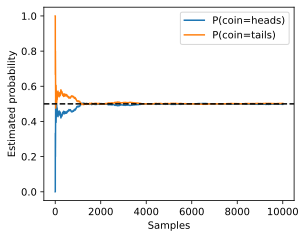

In [41]:
counts = Multinomial(1, fair_probs).sample((10000,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
estimates = estimates.numpy()

d2l.set_figsize((4.5, 3.5))
d2l.plt.plot(estimates[:, 0], label=("P(coin=heads)"))
d2l.plt.plot(estimates[:, 1], label=("P(coin=tails)"))
d2l.plt.axhline(y=0.5, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Samples')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();

### A More Formal Treatment

Sampling + Frequency  
Toss a coin 100 times → record counts  
Divide by 100 (or 10,000) → frequency (empirical probability)

Sample Space (S)  
The set of all possible outcomes  
Example: S = {Heads, Tails}

Event (A)  
A subset of the sample space representing a condition we care about  
Outcome → result of a single trial  
Event → set of possible outcomes  
Example (two coin tosses):  
A = {(H, H), (H, T)}  
This can represent how many times Head occurs

Probability Function (P)  
A rule that assigns chances to events  
P(A) = probability that event A occurs

Distribution  
A named model for the probability rule  
Passing `fair_probs` to a Multinomial distribution parameterizes the distribution  
These parameters determine the probability function


## Probability & Statistics Concepts Cheat Sheet

| Concept | Definition | Example (100 Coin Tosses) | 🧠 Memory Hook |
| :--- | :--- | :--- | :--- |
| **Sampling** | The actual process of collecting data or performing the experiment. | The act of physically flipping the coin 100 times. | **"The Tasting"**<br>(Taking a bite to see what the soup tastes like) |
| **Sample Space ($S$)** | The set of *all possible* outcomes that *could* happen. | The huge list of every possible sequence of H/T (e.g., HHH..., HHT..., THT...). | **"The Menu"**<br>(Everything you *could* order) |
| **Event ($E$)** | A specific outcome (or set of outcomes) you are looking for. | "Getting exactly 50 Heads" or "Getting more Heads than Tails." | **"The Order"**<br>(What you actually want from the menu) |
| **Frequency** | The actual number of times an event occurred in your sample. | You counted and found **53** Heads. The frequency is 53. | **"The Scoreboard"**<br>(What actually happened during the game) |
| **Relative Frequency** | The frequency divided by the total sample size (Percentage). | $53 / 100 = 0.53$ (53%). | **"The Batting Average"**<br>(Score normalized by attempts) |
| **Random Variable ($X$)** | The rule that turns the outcome (Heads/Tails) into a number. | $X$ = "Count the number of Heads." | **"The Translator"**<br>(Turns reality into math) |
| **Probability Function**<br>($P(X)$ or PMF/PDF) | A mathematical function that calculates the *theoretical chance* of a specific value occurring. | The formula that tells you the specific chance of getting exactly 50 Heads (approx 8%). | **"The Oracle"**<br>(Predicts the chance of a single number) |
| **Distribution** | The "shape" or list of probabilities for *all* possible values of the random variable. | A graph (Histogram) showing the probability for getting 0 Heads, 1 Head... up to 100 Heads. | **"The Map"**<br>(The bird's-eye view of all possibilities) |

### Random variable

Random Variable (X)  
A function that maps outcomes from the sample space to numbers  
X : S → ℝ

Example (coin toss):  
X = 1 if Head occurs  
X = 0 if Tail occurs

For two coin tosses:  
Outcomes: {(H,H), (H,T), (T,H), (T,T)}  
X = number of Heads  
X(H,H) = 2  
X(H,T) = 1  
X(T,H) = 1  
X(T,T) = 0

Types of Random Variables  
Discrete → takes countable values (e.g., number of Heads)  
Continuous → takes values from an interval (e.g., time, height)

Distribution of a Random Variable  
Describes how probability is assigned to values of X  
P(X = x) for discrete variables  
p(x) or f(x) for continuous variables

Expectation (Mean)  
A weighted average of possible values  
E[X] = Σ x · P(X = x)

Random Variable connects:  
Sample Space → Numbers → Probability Distribution


###  Multiple Random Variables

## Comparison: Random Variable vs. Multiple Random Variables

| Feature | Single Random Variable ($X$) | Multiple Random Variables ($X, Y$) |
| :--- | :--- | :--- |
| **Simple Definition** | A rule that turns an event into **one number**. | A rule that turns an event into a **list (vector) of numbers**. |
| **The Analogy** | **The Thermometer:** It tells you just the temperature. | **The Weather Station:** It tells you temperature, humidity, and wind speed. |
| **The Output** | A Scalar (e.g., `53`) | A Vector / Pair (e.g., `(53, 47)`) |
| **Coin Example**<br>(100 Tosses) | **$X$ = Count Heads**<br>Result: You get **53**. | **$X$ = Count Heads, $Y$ = Count Tails**<br>Result: You get the pair **(53, 47)**. |
| **Key Question** | "How many?" or "How much?" | "How are these things related?" or "Do they move together?" |
| **What we analyze** | **Distribution:** How likely is a specific number? | **Joint Distribution / Correlation:** If $X$ changes, does $Y$ change too? |
| **Visual Graph** | A flat 2D histogram (Bar chart). | A 3D graph or a Scatter Plot. |

### 🧠 Memory Hooks

* **Single Random Variable:** Think of a **Ruler**. It measures *one* dimension (length).
* **Multiple Random Variables:** Think of a **Coordinate ($x, y$)**. It locates a point using *two or more* dimensions.

### Expectations

the average value a random variable takes in the long run

## Complete Statistics Concepts Cheat Sheet

| Concept | Definition | Example (100 Coin Tosses) | 🧠 Memory Hook |
| :--- | :--- | :--- | :--- |
| **Sampling** | The actual process of collecting data. | Flipping the coin 100 times. | **"The Tasting"** |
| **Sample Space ($S$)** | The set of *all* possible outcomes. | Every possible sequence (HHH.., HHT.., etc.). | **"The Menu"** |
| **Event ($E$)** | A specific outcome you want. | "Getting exactly 50 Heads." | **"The Order"** |
| **Random Variable ($X$)** | The rule turning outcomes into numbers. | $X$ = "Count the Heads." | **"The Translator"** |
| **Expectation / Mean**<br>($E[X]$ or $\mu$) | The theoretical average if you did this forever. | You *expect* 50 Heads on average. | **"The Center of Gravity"**<br>(Where the scale balances) |
| **Variance**<br>($\text{Var}(X)$ or $\sigma^2$) | Measures how far results are spread from the average (squared). | High variance means getting 10 or 90 heads is common. Low means you usually stay near 50. | **"The Wildness"**<br>(How erratic is the data?) |
| **Standard Deviation**<br>($\sigma$) | The spread in *real units* (Square root of Variance). | "Most results will be within $\pm 5$ heads of the average." | **"The Trust Zone"**<br>(The typical error margin) |
| **Probability Function**<br>(PMF/PDF) | Math calculating the chance of *one* specific value. | The formula saying $P(50 \text{ heads}) \approx 8\%$. | **"The Oracle"** |
| **Distribution** | The list/graph of probabilities for *all* values. | The bell-shaped curve showing all possibilities. | **"The Map"** |